In [ ]:
# !pip install yfinance

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
data = yf.download(tickers = 'HPQ', progress = False, start = '2020-06-16', end = '2023-06-01')
data.drop(['High', 'Low', 'Close', 'Adj Close', 'Close', 'Volume'], axis = 1, inplace = True)
data.head()

,Open
Date,
2020-06-16,17.400000
2020-06-17,17.340000
2020-06-18,16.629999
2020-06-19,17.240000
2020-06-22,16.670000


<Axes: xlabel='Date'>

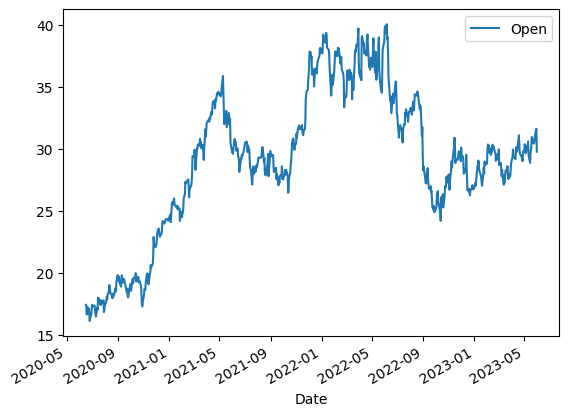

In [ ]:
data.plot()

In [ ]:
timeseries = data.values
from sklearn.preprocessing import MinMaxScaler
myscaler = MinMaxScaler()
timeseries = myscaler.fit_transform(timeseries)

In [ ]:
train_size =int(len(timeseries)*0.7)
test_size =len(timeseries) -train_size
train,test =timeseries[0:train_size,:],timeseries[train_size:len(timeseries),:]

In [ ]:
def create_timeseries(timeseries,step):
    dataX,dataY =[],[]
    for i in range(len(timeseries)-step-1):
        a =timeseries[i:(i+step),0]
        dataX.append(a)
        dataY.append(timeseries[i+step,0])
    return np.array(dataX),np.array(dataY)
step_size=4
X_train, y_train =create_timeseries(train,step_size)
X_test,y_test =create_timeseries(test,step_size)

In [ ]:
X_train =np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
from keras.models import  Sequential
from keras.layers import Dense, LSTM,Bidirectional

In [ ]:
model =Sequential()
model.add(LSTM(units=4,input_shape=(step_size,1),activation='relu',return_sequences=True))
model.add(LSTM(units=4,activation='relu',return_sequences=True))
model.add(LSTM(units=4,activation='relu',return_sequences=True))
model.add(LSTM(units=4,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 4, 4)              96        
                                                                 
 lstm_37 (LSTM)              (None, 4, 4)              144       
                                                                 
 lstm_38 (LSTM)              (None, 4, 4)              144       
                                                                 
 lstm_39 (LSTM)              (None, 4)                 144       
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 577
Trainable params: 577
Non-trainable 

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1,verbose=1,epochs=100)

In [ ]:
!pip install transformers

In [2]:
from transformers import pipeline

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Twitter-Sentiment-Analysis/master/train_tweet.csv")
data =data.sample(n=50)

data.head()

,id,label,tweet
20399,20400,0,i think am not supposed to get married fact ...
29414,29415,0,#liveme #lgbt #transguy #youtuber brennank....
22217,22218,1,"@user #allahsoil the more familiar we become, ..."
4596,4597,0,leaving for my last #kadesh tomorrow! #kades...
8881,8882,0,bihday my dear fellow fish....ðððð...


In [10]:
classification = pipeline('sentiment-analysis')
for  i, row in data.iterrows():
    text = row["tweet"]
    result = classification(text)
    label = result[0]["label"]
    score = result[0]["score"]
    print("label: ", label ," score: ", score)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


label:  NEGATIVE  score:  0.988353967666626
label:  NEGATIVE  score:  0.9432246685028076
label:  NEGATIVE  score:  0.9984604120254517
label:  NEGATIVE  score:  0.5679721832275391
label:  POSITIVE  score:  0.6498417258262634
label:  POSITIVE  score:  0.992360532283783
label:  POSITIVE  score:  0.8391700983047485
label:  NEGATIVE  score:  0.9977996945381165
label:  POSITIVE  score:  0.5966577529907227
label:  NEGATIVE  score:  0.9816546440124512
label:  POSITIVE  score:  0.999657154083252
label:  NEGATIVE  score:  0.9989884495735168
label:  NEGATIVE  score:  0.996356725692749
label:  NEGATIVE  score:  0.994452178478241
label:  NEGATIVE  score:  0.7380715012550354
label:  POSITIVE  score:  0.9976181387901306
label:  NEGATIVE  score:  0.9889910221099854
label:  POSITIVE  score:  0.7840771675109863
label:  POSITIVE  score:  0.996340274810791
label:  POSITIVE  score:  0.9883905649185181
label:  NEGATIVE  score:  0.9991557598114014
label:  NEGATIVE  score:  0.9803787469863892
label:  NEGATIVE